Import Statements

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import pandas_datareader as web
from mpl_finance import candlestick_ohlc

Define Time Frame

In [6]:
#start = dt.datetime(2022,1,1)
print("Please enter a date in the format of YYYY,MM,DD")
try:
    startdate = input()
    starting = startdate.split(',')
    startyear = int(starting[0])
    startmonth = int(starting[1])
    startday = int(starting[2])
    start = dt.datetime(startyear, startmonth, startday)
except ValueError:
    print("Incorrect date format. Please try again using YYYY,MM,DD.")
end = dt.datetime.now()

Please enter a date in the format of YYYY,MM,DD


 2019,02,14


Choose Which Company's Data to Load

In [7]:
company = input("Enter the company's ticker name. For example AAPL for Apple")
data = web.DataReader(company, 'yahoo', start, end)
print(data)

 AAPL


                  High         Low        Open       Close       Volume  \
Date                                                                      
2019-02-14   42.814999   42.345001   42.427502   42.700001   87342800.0   
2019-02-15   42.924999   42.437500   42.812500   42.605000   98507200.0   
2019-02-19   42.860001   42.372501   42.427502   42.732498   75891200.0   
2019-02-20   43.330002   42.747501   42.797501   43.007500  104457600.0   
2019-02-21   43.092499   42.575001   42.950001   42.764999   68998800.0   
...                ...         ...         ...         ...          ...   
2022-10-28  157.500000  147.820007  148.199997  155.740005  164762400.0   
2022-10-31  154.240005  151.919998  153.160004  153.339996   97943200.0   
2022-11-01  155.449997  149.130005  155.080002  150.649994   80379300.0   
2022-11-02  152.169998  145.000000  148.949997  145.029999   93604600.0   
2022-11-03  142.800003  138.750000  142.059998  138.880005   97572100.0   

             Adj Close  

Restructuring Data

In [8]:
cleaned_data = data[['Open','High','Low','Close']]
print(cleaned_data)

                  Open        High         Low       Close
Date                                                      
2019-02-14   42.427502   42.814999   42.345001   42.700001
2019-02-15   42.812500   42.924999   42.437500   42.605000
2019-02-19   42.427502   42.860001   42.372501   42.732498
2019-02-20   42.797501   43.330002   42.747501   43.007500
2019-02-21   42.950001   43.092499   42.575001   42.764999
...                ...         ...         ...         ...
2022-10-28  148.199997  157.500000  147.820007  155.740005
2022-10-31  153.160004  154.240005  151.919998  153.339996
2022-11-01  155.080002  155.449997  149.130005  150.649994
2022-11-02  148.949997  152.169998  145.000000  145.029999
2022-11-03  142.059998  142.800003  138.750000  138.880005

[939 rows x 4 columns]


In [14]:
cleaned_data.reset_index(inplace=True)
print(cleaned_data)

          Date        Open        High         Low       Close
0   2019-02-14   42.427502   42.814999   42.345001   42.700001
1   2019-02-15   42.812500   42.924999   42.437500   42.605000
2   2019-02-19   42.427502   42.860001   42.372501   42.732498
3   2019-02-20   42.797501   43.330002   42.747501   43.007500
4   2019-02-21   42.950001   43.092499   42.575001   42.764999
..         ...         ...         ...         ...         ...
934 2022-10-28  148.199997  157.500000  147.820007  155.740005
935 2022-10-31  153.160004  154.240005  151.919998  153.339996
936 2022-11-01  155.080002  155.449997  149.130005  150.649994
937 2022-11-02  148.949997  152.169998  145.000000  145.029999
938 2022-11-03  142.059998  142.800003  138.750000  138.880005

[939 rows x 5 columns]


In [15]:
cleaned_data['Date'] = cleaned_data['Date'].map(mdates.date2num)
print(cleaned_data)

        Date        Open        High         Low       Close
0    17941.0   42.427502   42.814999   42.345001   42.700001
1    17942.0   42.812500   42.924999   42.437500   42.605000
2    17946.0   42.427502   42.860001   42.372501   42.732498
3    17947.0   42.797501   43.330002   42.747501   43.007500
4    17948.0   42.950001   43.092499   42.575001   42.764999
..       ...         ...         ...         ...         ...
934  19293.0  148.199997  157.500000  147.820007  155.740005
935  19296.0  153.160004  154.240005  151.919998  153.339996
936  19297.0  155.080002  155.449997  149.130005  150.649994
937  19298.0  148.949997  152.169998  145.000000  145.029999
938  19299.0  142.059998  142.800003  138.750000  138.880005

[939 rows x 5 columns]


C:\Users\bombe\AppData\Local\Temp\ipykernel_23684\3248950835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = cleaned_data['Date'].map(mdates.date2num)


Data Visualization

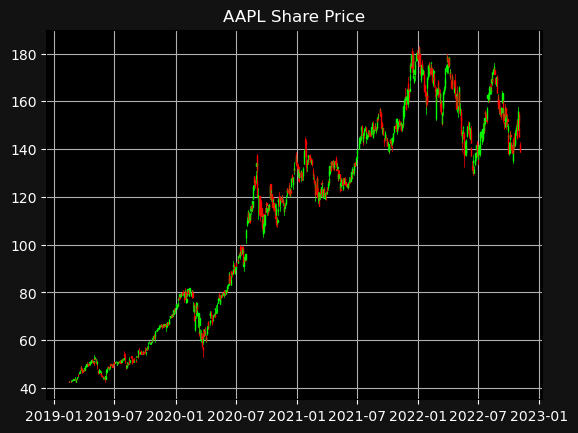

In [16]:
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title(company + ' Share Price', color='white')
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis_date()


candlestick_ohlc(ax, cleaned_data.values, width=0.5, colorup='#00ff00')
plt.show()